### 1. Data Loading

We will load the Iris dataset using `seaborn.load_dataset`.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset
iris_df = sns.load_dataset('iris')

# Display the first 5 rows and basic info
print("First 5 rows of the dataset:")
display(iris_df.head())

print("\nDataset Information:")
iris_df.info()

print("\nNumber of unique species:", iris_df['species'].nunique())
print("Species distribution:\n", iris_df['species'].value_counts())

First 5 rows of the dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Number of unique species: 3
Species distribution:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


### 2. Exploratory Data Analysis (EDA)

We will use `seaborn.pairplot` to visualize the relationships between the features, colored by species, to understand how well the species are separated by these measurements.

<Figure size 1000x800 with 0 Axes>

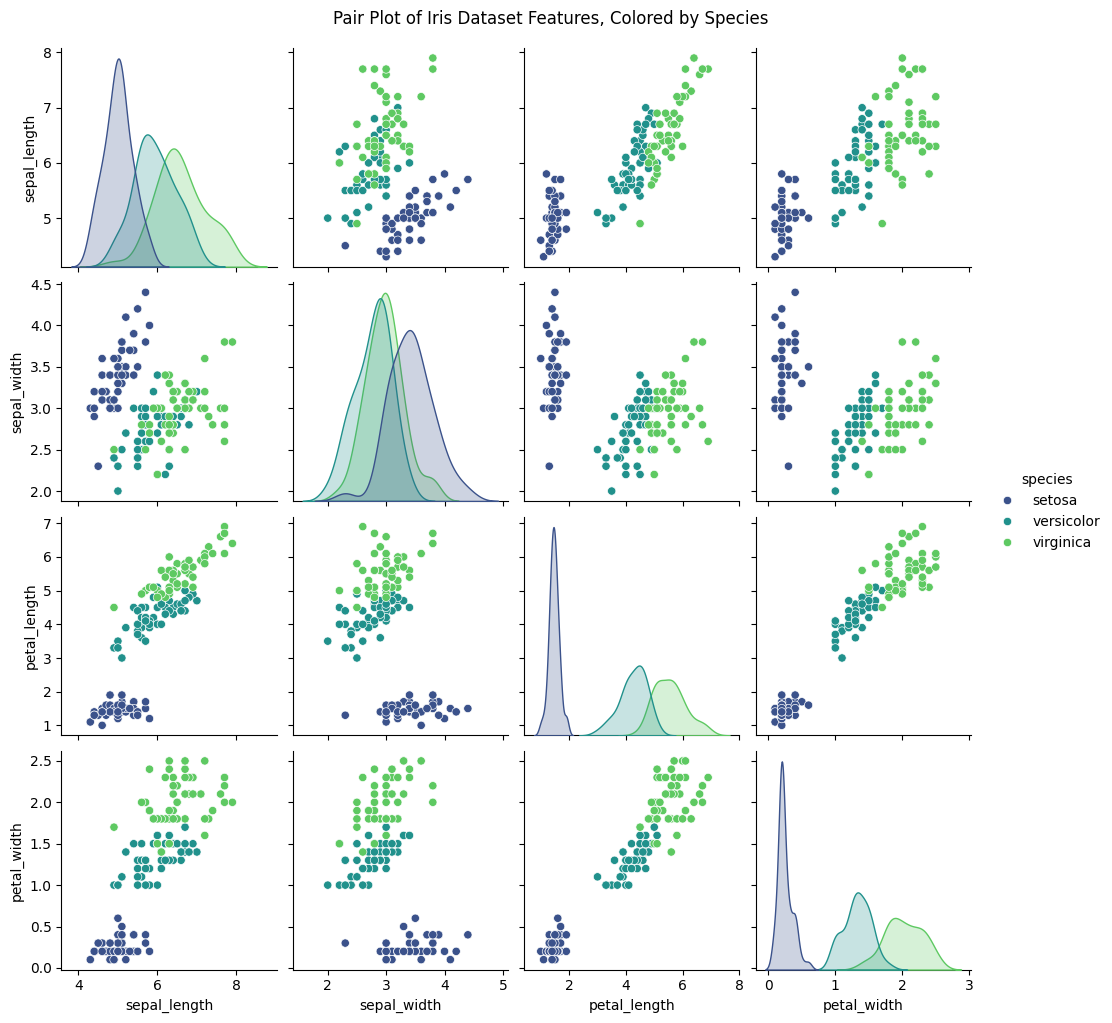

In [2]:
plt.figure(figsize=(10, 8))
sns.pairplot(iris_df, hue='species', palette='viridis')
plt.suptitle('Pair Plot of Iris Dataset Features, Colored by Species', y=1.02)
plt.show()

### 3. Preprocessing

We will separate the features (X) from the target variable (y) and then split the data into training and testing sets.

In [3]:
# Separate features (X) and target (y)
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 120 samples
Testing set size: 30 samples


### 4. Model Training (K-Neighbors Classifier)

We will train a K-Neighbors Classifier (KNN) model on the training data. For simplicity, we'll start with `n_neighbors=5`.

In [4]:
# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

print("KNN Model trained successfully!")

KNN Model trained successfully!


### 5. Evaluation

We will evaluate the model's performance by calculating the accuracy score and plotting a confusion matrix heatmap.

Model Accuracy: 1.0000


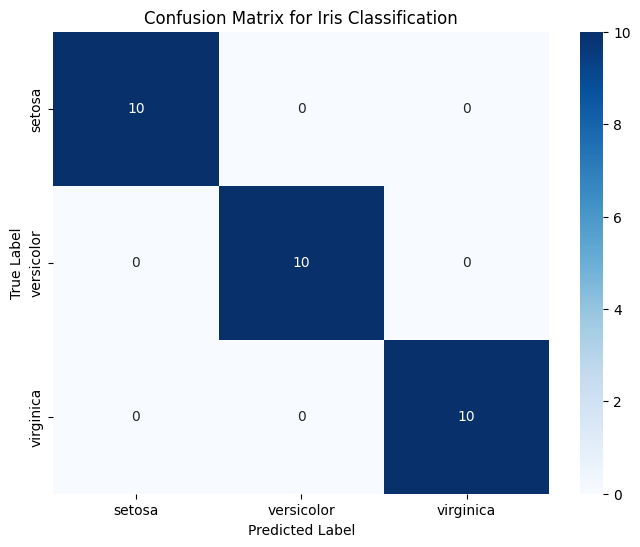

In [5]:
# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Iris Classification')
plt.show()